# Unsupervised learning
Recall our slides on unsupervised learning - no hints to the computer about the data :)

## Principal components analysis
We will explore one method for unsupervised learning - Principal components analysis (PCA). We will use the gene expression dataset we already worked with in the data wrangling exercises. 

In [1]:
# packages needed for the exercise.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%%bash 
wget https://github.com/Center-for-Health-Data-Science/IntroToML/raw/main/data/gtex_1000.csv.gz


--2022-05-26 12:57:47--  https://github.com/Center-for-Health-Data-Science/IntroToML/raw/main/data/gtex_1000.csv.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/Center-for-Health-Data-Science/IntroToML/main/data/gtex_1000.csv.gz [following]
--2022-05-26 12:57:48--  https://media.githubusercontent.com/media/Center-for-Health-Data-Science/IntroToML/main/data/gtex_1000.csv.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9481366 (9.0M) [application/octet-stream]
Saving to: ‘gtex_1000.csv.gz’

     0K .......... .......... .......... .......... ..........  0% 7.90M 1s
    50K ..

In [5]:
gtex_rnaseq = pd.read_table("gtex_1000.csv.gz", sep="\t")

We already know that the data consists of 7 tissues, with expression from 1000 genes. Let us begin by trying to do a principal components analysis. Before we do this, let us remove the "tissue" column from the data, and log-transform the expression values.

In [6]:
from sklearn.decomposition import PCA

# remove the tissue column.
x = gtex_rnaseq.loc[:, gtex_rnaseq.columns.drop('tissue')].values
# log scale the data
x = np.log(x+0.01)

# fit pca with only 2 components.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Add the tissue to the data frame
principalDf["tissue"] = gtex_rnaseq["tissue"]

Now, let us plot these first 2 components to see what they can tell us about the how gene expression values might be informing on the tissue identity. 

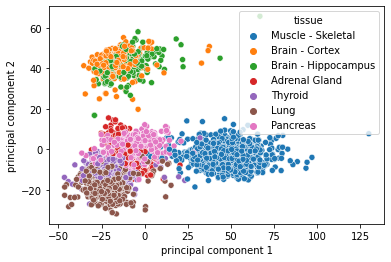

In [7]:
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue="tissue")

Now try doing this for four principal components and plot pc1 vs pc2, and pc3 vs pc4. Do the pcs 1 and 2 look the same when you estimate 2 total PCs or 4 total PCs?

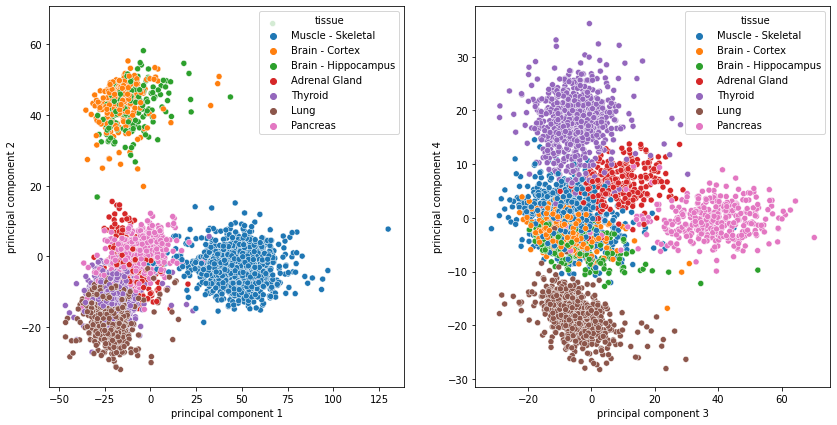

In [19]:
# fit pca with 4 components.
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf4 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
# Add the tissue to the data frame
fig, axs = plt.subplots(1, 2, figsize=(14,7))
principalDf4["tissue"] = gtex_rnaseq["tissue"]
sns.scatterplot(ax=axs[0], data=principalDf4, x="principal component 1", y="principal component 2", hue="tissue")
sns.scatterplot(ax=axs[1], data=principalDf4, x="principal component 3", y="principal component 4", hue="tissue")

Now let us try a true dimension reduction method, multidimensional scaling - MDS - instead of PCA, and repeat the process of estimating 2 or 4 dimensions. Multidimensional scaling is a manifold estimation method, which assumes that the high dimensional data comes from a lower dimensional manifold, and this manifold is what MDS is trying to estimate. Compare the first 2 dimensions when estimating 2 or 4 dimensions. What happens? Do the dimesions remain the same or do they change?

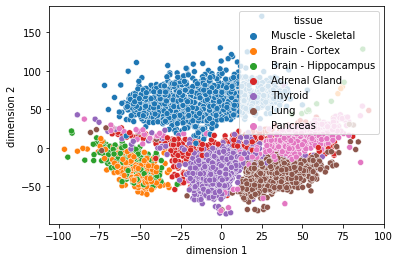

In [20]:
from sklearn.manifold import MDS, TSNE

# fit pca with only 2 components.
mds = MDS(n_components=2)
mds_fit = mds.fit_transform(x)
mds_df = pd.DataFrame(data = mds_fit, columns = ['dimension 1', 'dimension 2'])

mds_df["tissue"] = gtex_rnaseq["tissue"]
sns.scatterplot(data=mds_df, x="dimension 1", y="dimension 2", hue="tissue")

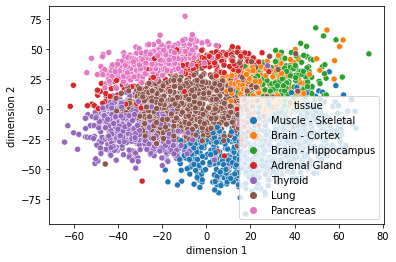

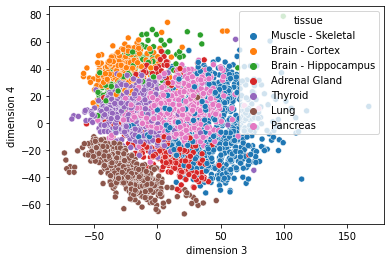

In [ ]:
mds = MDS(n_components=4)
mds_fit = mds.fit_transform(x)
mds_df4 = pd.DataFrame(data = mds_fit, columns = ['dimension 1', 'dimension 2', 'dimension 3', 'dimension 4'])

mds_df4["tissue"] = gtex_rnaseq["tissue"]
sns.scatterplot(data=mds_df4, x="dimension 1", y="dimension 2", hue="tissue")
plt.figure()
sns.scatterplot(data=mds_df4, x="dimension 3", y="dimension 4", hue="tissue")

Notice how dimensions 1 and 2 are completely different when we estimate 2 or 4 dimensions with MDS.

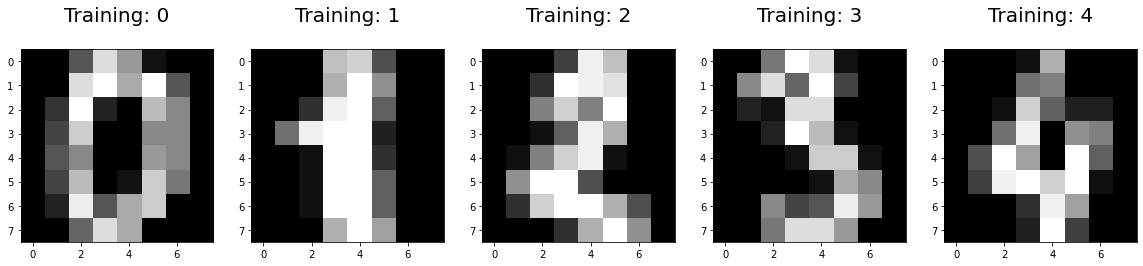

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

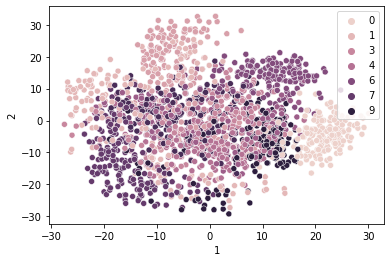

In [22]:
pca = PCA(n_components=20)
pca_mnist = pca.fit_transform(digits.data)
names = np.arange(20)
names = names.astype(str)
pca_mnist_df = pd.DataFrame(data = pca_mnist, columns = names)
sns.scatterplot(data=pca_mnist_df, x="1", y="2", hue=digits.target)

Now let us try and use a new method on this dataset. t-SNE is another manifold approximation method. We are going to run t-SNE on the full digits dataset and then follow up with using t-SNE on the first 10 PCs of the digits data. 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Text(0.5, 1.0, 'PCA t-SNE')

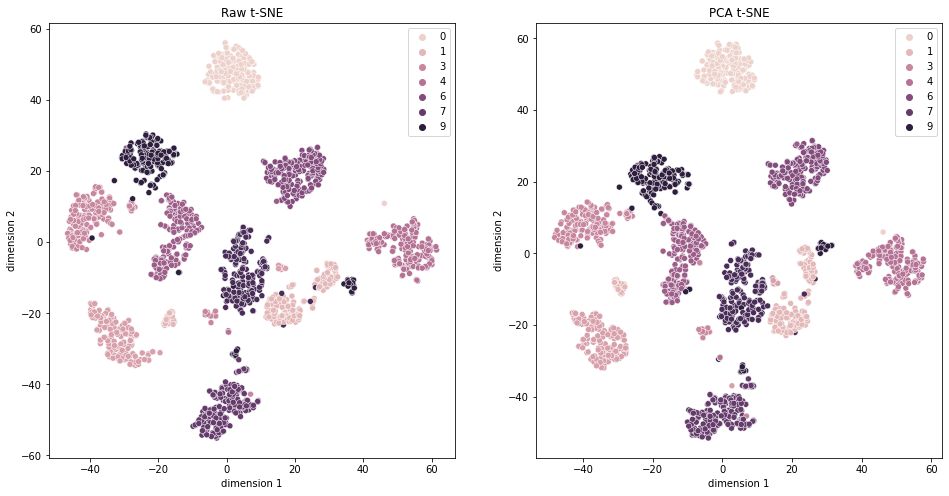

In [28]:
raw_tsne = TSNE(n_components=2, init='pca', learning_rate='auto')
raw_tsne_fit = raw_tsne.fit_transform(digits.data)
raw_tsne_df = pd.DataFrame(data = raw_tsne_fit, columns = ['dimension 1', 'dimension 2'])
pca_tsne_fit = raw_tsne.fit_transform(pca_mnist_df)
pca_tsne_df = pd.DataFrame(data = pca_tsne_fit, columns = ['dimension 1', 'dimension 2'])
fig, axs = plt.subplots(1,2,figsize=(16,8))
sns.scatterplot(ax=axs[0], data=raw_tsne_df, x="dimension 1", y="dimension 2", hue=digits.target, legend=True)
axs[0].set_title("Raw t-SNE")

sns.scatterplot(ax=axs[1], data=pca_tsne_df, x="dimension 1", y="dimension 2", hue=digits.target, legend=True)
axs[1].set_title("PCA t-SNE")